# Proyecto I 
* Monica Alfaro Parrales
* Adrián Ramírez Mattey
* Gilberth Rodríguez Mejías 

## Carga del dataset "Pima Indians Diabetes Database"

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from IPython.display import display
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

In [87]:
data = pd.read_csv('diabetes.csv')
print("data head")
display(data.head())
print("data describe")
display(data.describe())
display(data)

X = data[[
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'
]].values

y = data['Outcome']

data head


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


data describe


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Análisis de datos
1 = Diabetes

0 = No diabetes

### Gráficos de dispersión 

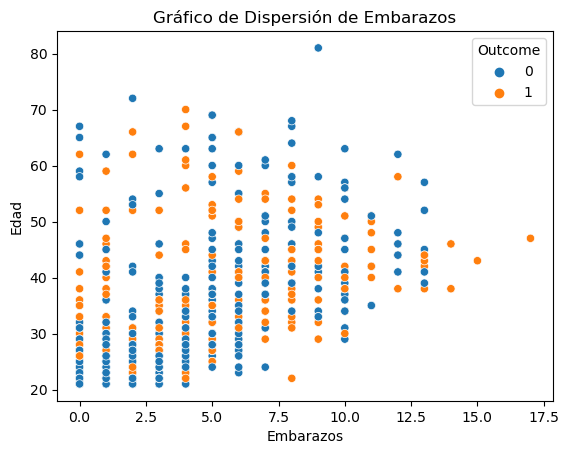

In [88]:
sns.scatterplot(x='Pregnancies', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Embarazos")
plt.xlabel("Embarazos")
plt.ylabel("Edad")
plt.show()

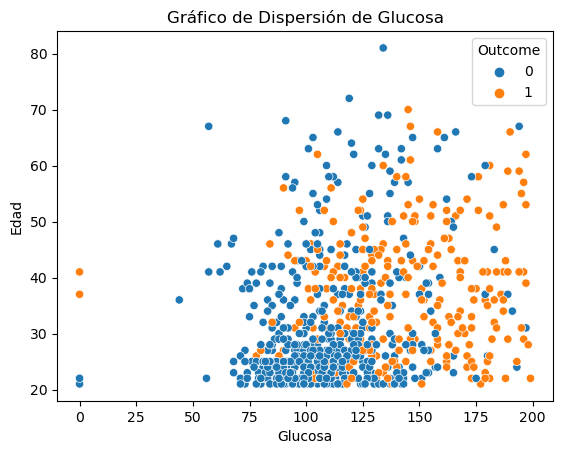

In [89]:
sns.scatterplot(x='Glucose', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Glucosa")
plt.xlabel("Glucosa")
plt.ylabel("Edad")
plt.show()

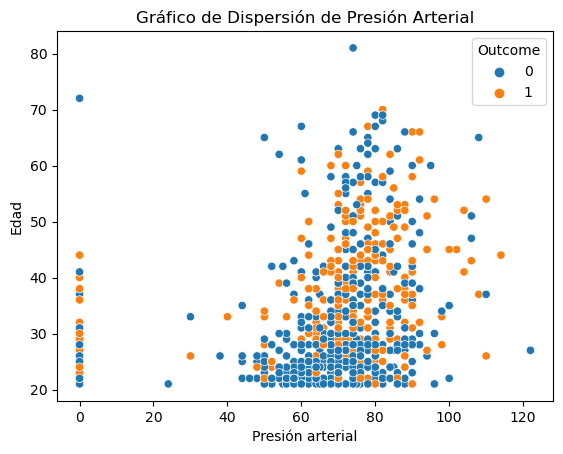

In [90]:
sns.scatterplot(x='BloodPressure', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Presión Arterial")
plt.xlabel("Presión arterial")
plt.ylabel("Edad")
plt.show()

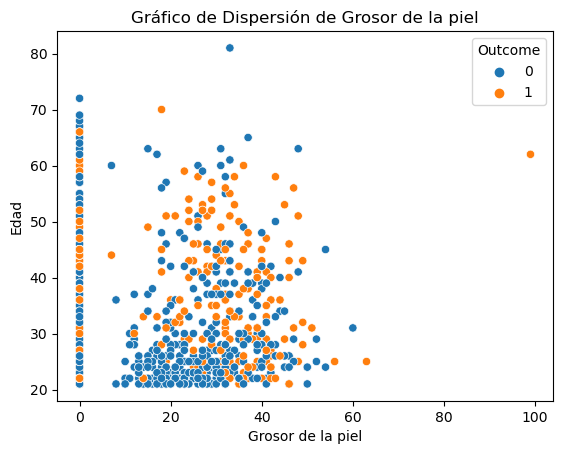

In [91]:
sns.scatterplot(x='SkinThickness', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Grosor de la piel")
plt.xlabel("Grosor de la piel")
plt.ylabel("Edad")
plt.show()

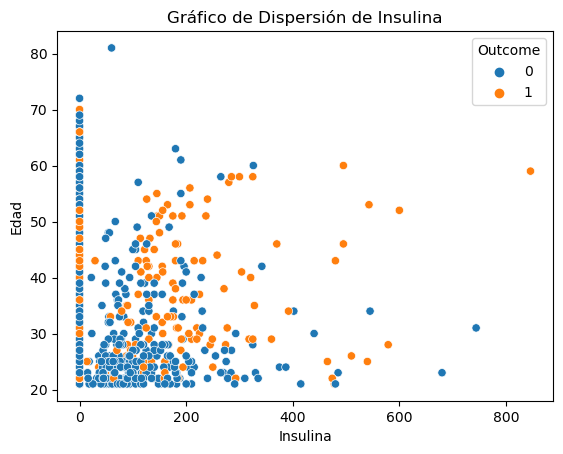

In [92]:
sns.scatterplot(x='Insulin', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Insulina")
plt.xlabel("Insulina")
plt.ylabel("Edad")
plt.show()

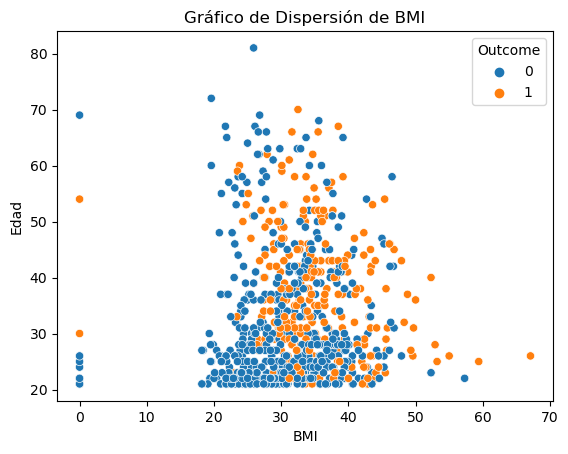

In [93]:
sns.scatterplot(x='BMI', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de BMI")
plt.xlabel("BMI")
plt.ylabel("Edad")
plt.show()

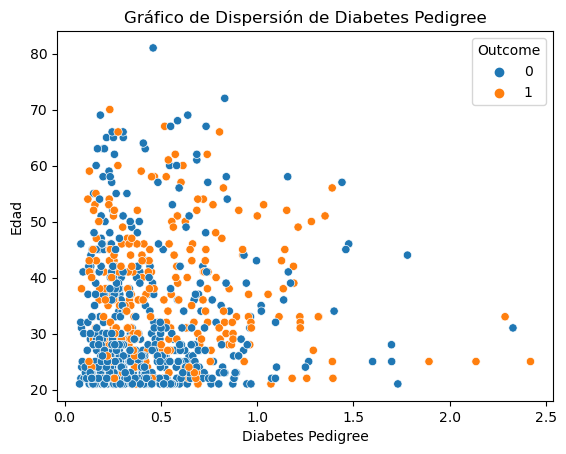

In [94]:
sns.scatterplot(x='DiabetesPedigreeFunction', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Diabetes Pedigree")
plt.xlabel("Diabetes Pedigree")
plt.ylabel("Edad")
plt.show()


### Histogramas

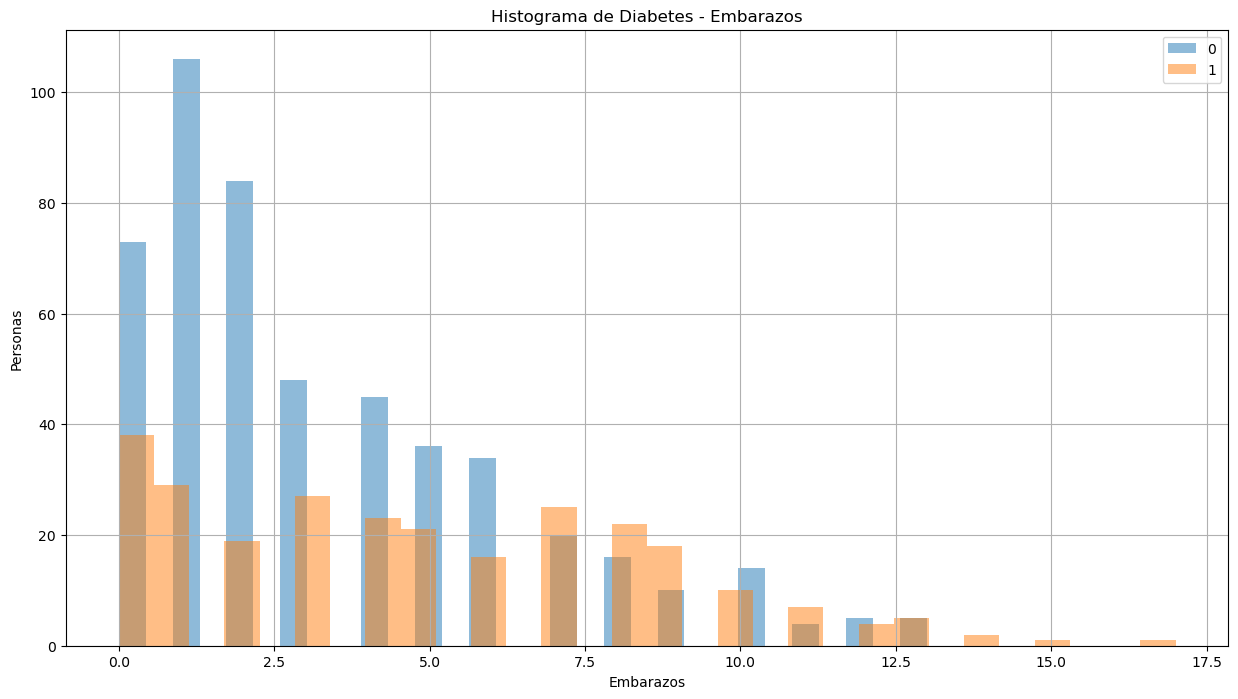

In [95]:
dataGroup = data.groupby('Outcome')
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['Pregnancies'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['Pregnancies'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - Embarazos')
plt.xlabel('Embarazos')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

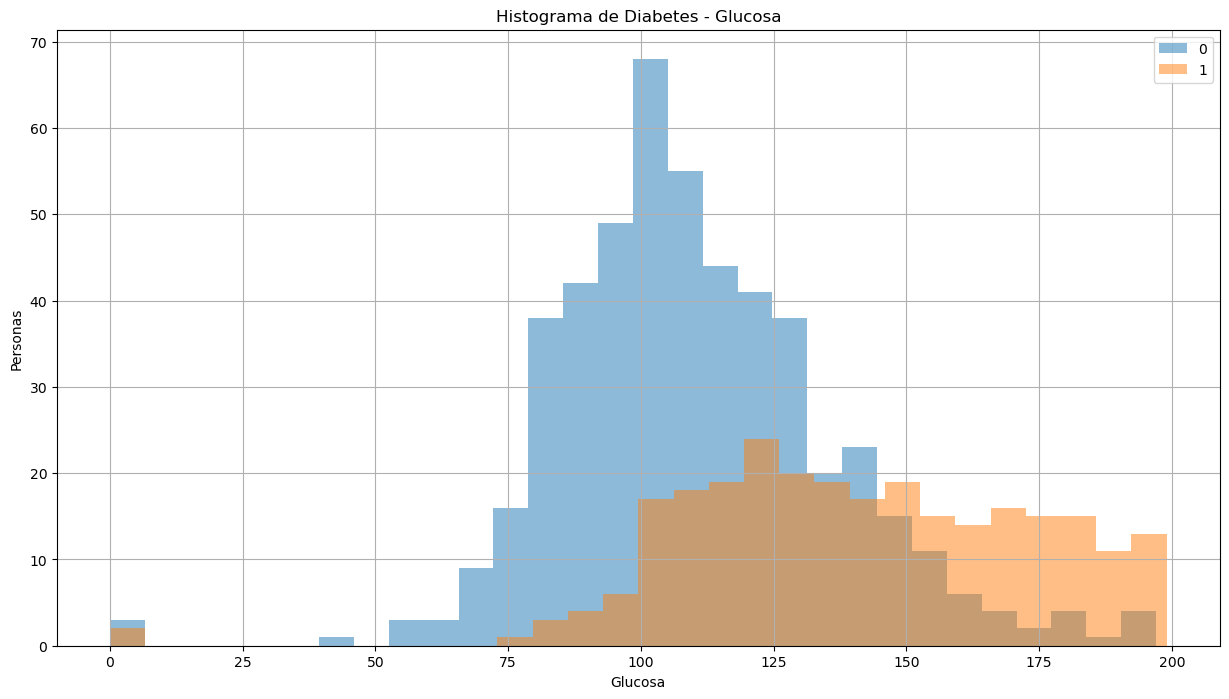

In [96]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['Glucose'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['Glucose'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - Glucosa')
plt.xlabel('Glucosa')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

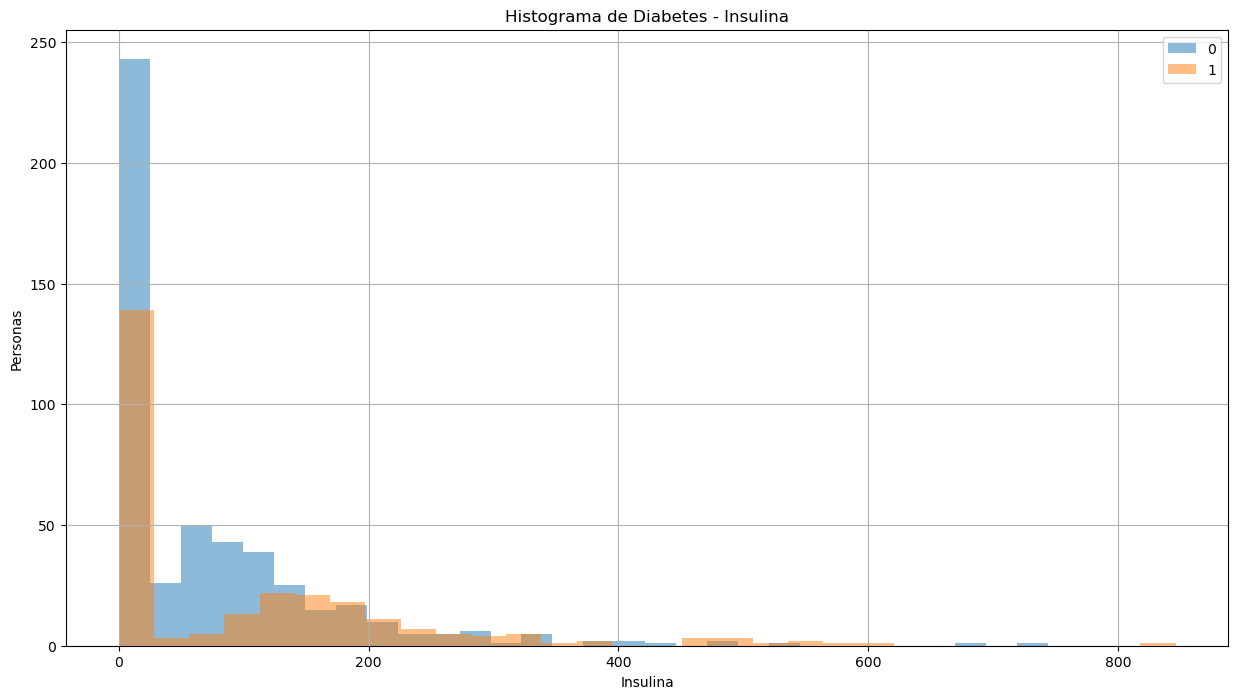

In [97]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['Insulin'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['Insulin'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - Insulina')
plt.xlabel('Insulina')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

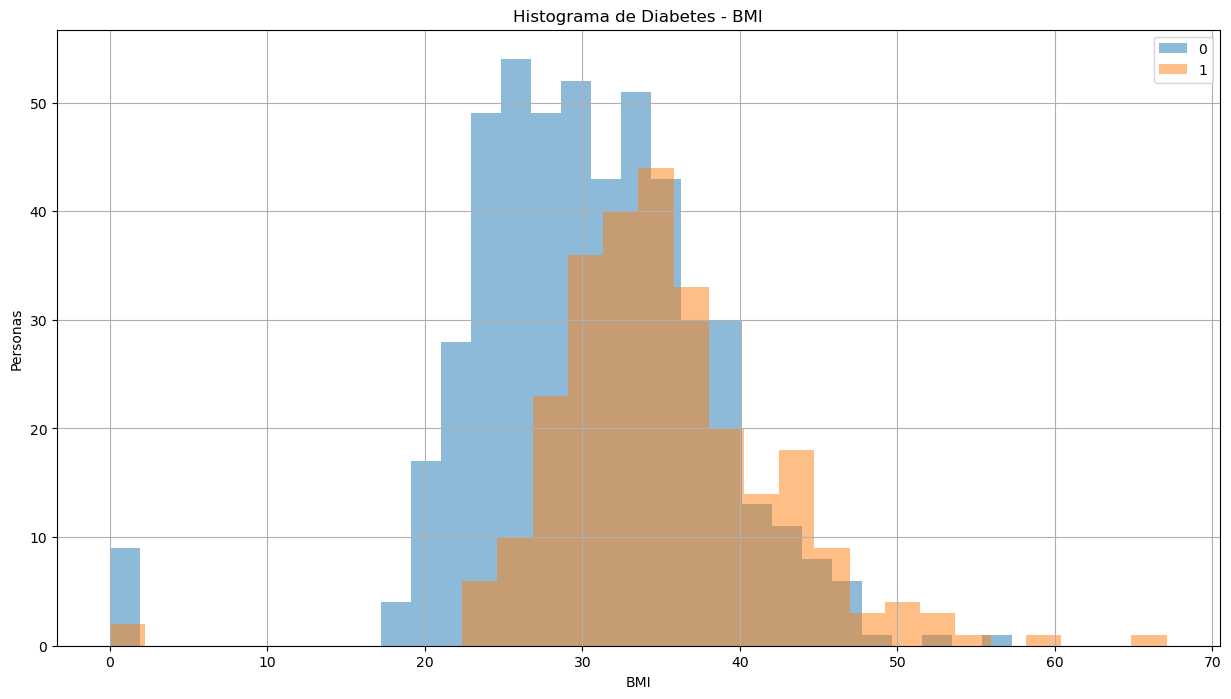

In [98]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['BMI'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['BMI'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - BMI')
plt.xlabel('BMI')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

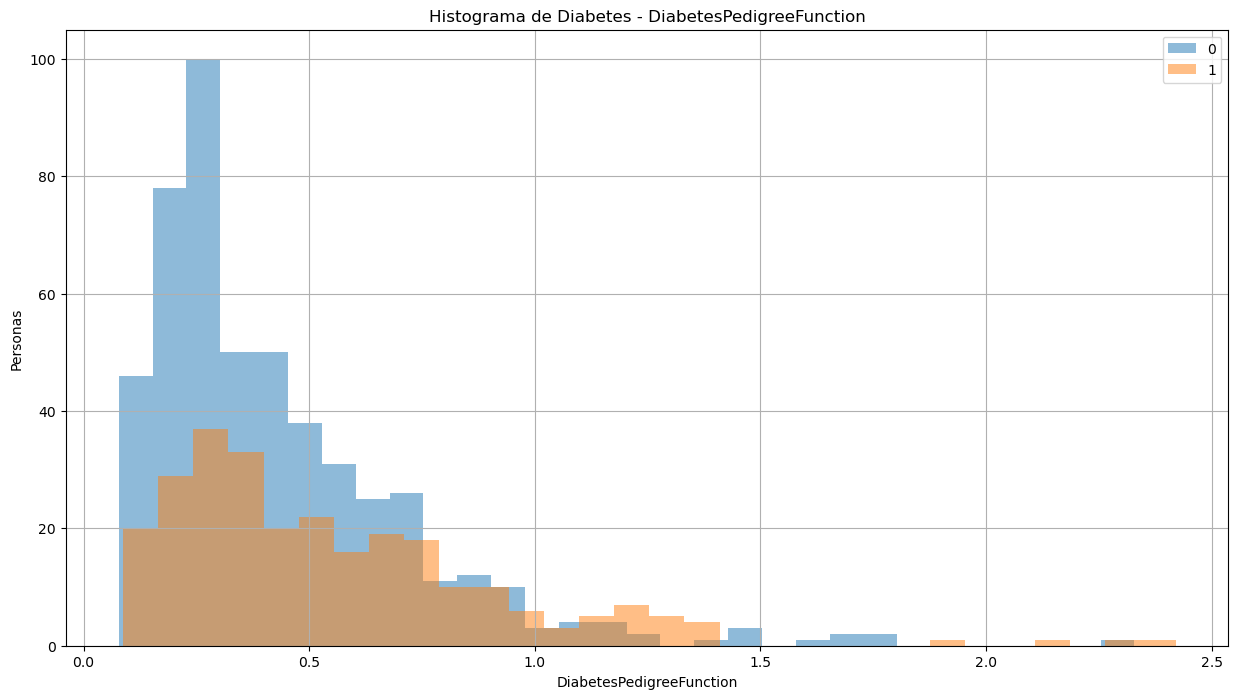

In [99]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['DiabetesPedigreeFunction'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['DiabetesPedigreeFunction'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - DiabetesPedigreeFunction')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

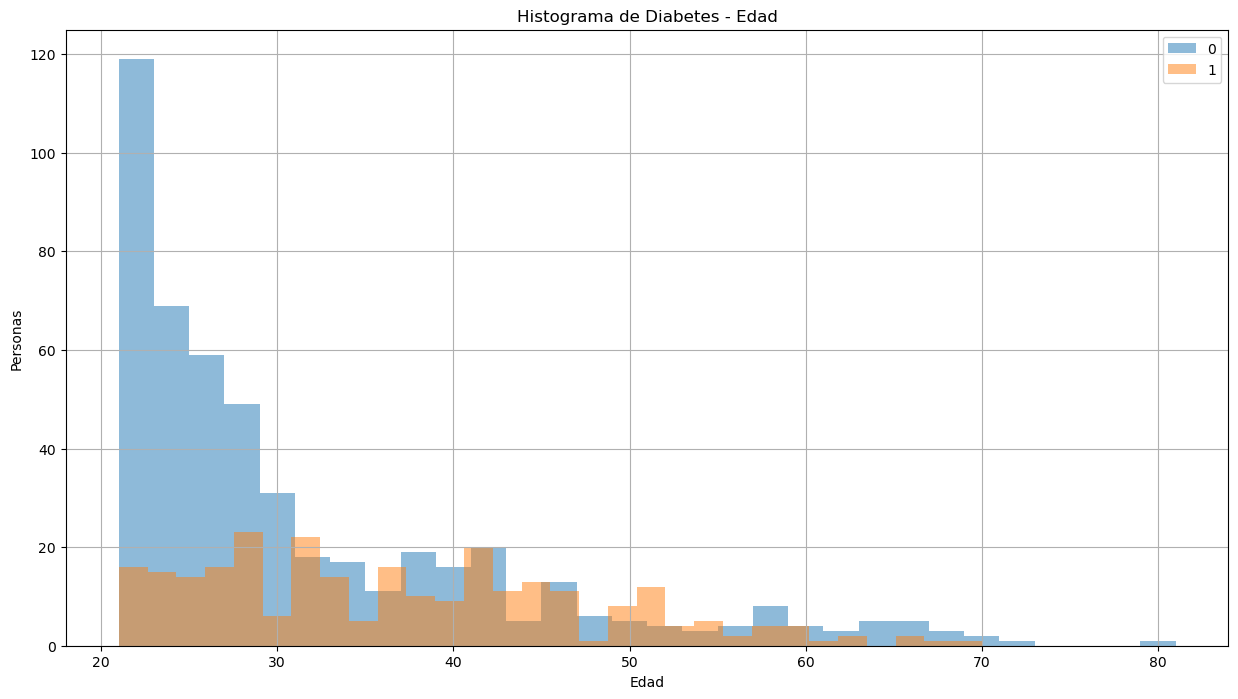

In [100]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['Age'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['Age'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - Edad')
plt.xlabel('Edad')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

## Eliminación de outliers y división del dataset
Se procede a hacer uso de IQR, el rango intercuartil (IQR) es la diferencia entre el percentil 75 y el 25 de los datos. Es una medida de dispersión similar a la desviación estándar o la varianza, pero es mucho más robusta frente a valores atípicos. Posteriormente, se hace un shuffle de la data para asegurar una mayor distribución y se divide el dataset en un 80% training y 20% testing. 

In [101]:
# Calcula el IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identifica los outliers
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

# Encuentra las filas que tienen al menos un outlier
outliers_indices = outliers.any(axis=1)

# Muestra las filas con outliers
print("Filas con outliers:")
display(data[outliers_indices])

# Elimina los outliers
data_sin_outliers = data[~outliers_indices]

# Muestra el conjunto de datos sin outliers
print("Data sin outliers:")
display(data_sin_outliers)

# Estadísticas del conjunto de datos sin outliers
print("Data sin outliers")
display(data_sin_outliers.describe())

Filas con outliers:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
12,10,139,80,0,0,27.1,1.441,57,0
...,...,...,...,...,...,...,...,...,...
706,10,115,0,0,0,0.0,0.261,30,1
707,2,127,46,21,335,34.4,0.176,22,0
710,3,158,64,13,387,31.2,0.295,24,0
715,7,187,50,33,392,33.9,0.826,34,1


Data sin outliers:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Data sin outliers


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.00000,639.000000,639.000000,639.000000
mean,3.804382,119.112676,72.120501,20.563380,65.931142,32.00579,0.429177,32.715180,0.312989
std,3.260995,29.162175,11.348686,15.339991,79.569482,6.43397,0.250957,11.080651,0.464073
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.30000,0.242000,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,37.000000,32.00000,0.358000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,120.000000,35.95000,0.586000,40.000000,1.000000
max,13.000000,198.000000,106.000000,60.000000,318.000000,50.00000,1.191000,66.000000,1.000000


### Gráficos de dispersión posterior a eliminación de outliers

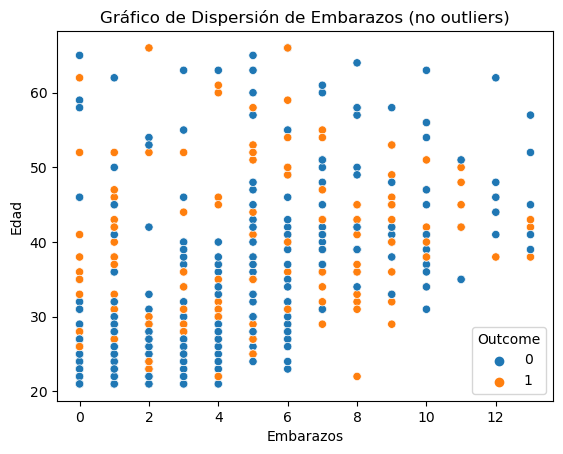

In [102]:
sns.scatterplot(x='Pregnancies', y='Age', hue='Outcome', data=data_sin_outliers, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Embarazos (no outliers)")
plt.xlabel("Embarazos")
plt.ylabel("Edad")
plt.show()

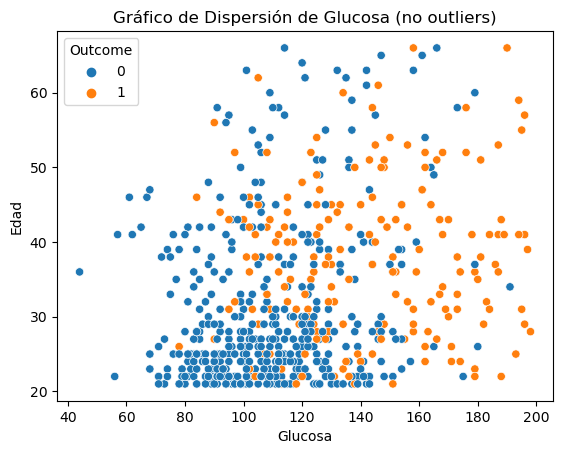

In [103]:
sns.scatterplot(x='Glucose', y='Age', hue='Outcome', data=data_sin_outliers )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Glucosa (no outliers)")
plt.xlabel("Glucosa")
plt.ylabel("Edad")
plt.show()


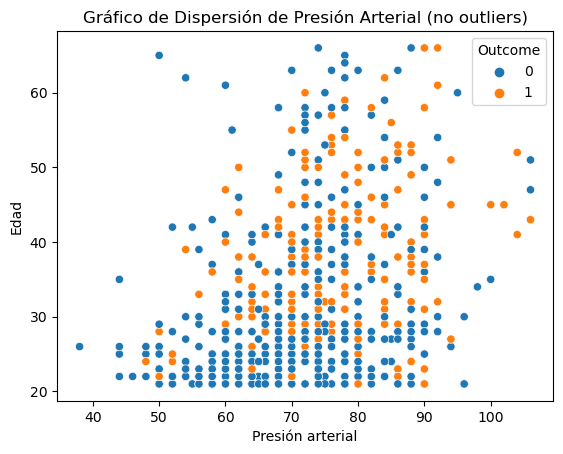

In [104]:
sns.scatterplot(x='BloodPressure', y='Age', hue='Outcome', data=data_sin_outliers, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Presión Arterial (no outliers)")
plt.xlabel("Presión arterial")
plt.ylabel("Edad")
plt.show()


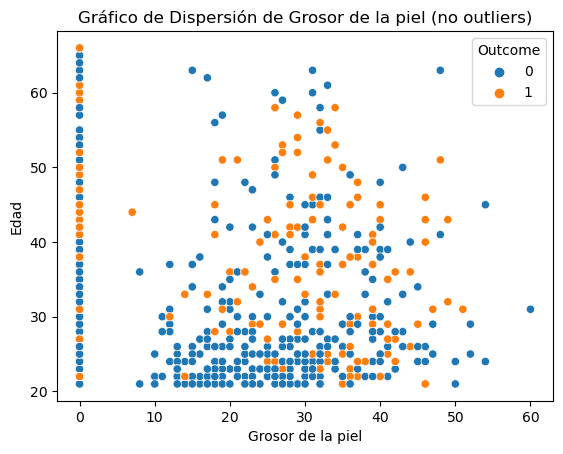

In [105]:
sns.scatterplot(x='SkinThickness', y='Age', hue='Outcome', data=data_sin_outliers, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Grosor de la piel (no outliers)")
plt.xlabel("Grosor de la piel")
plt.ylabel("Edad")
plt.show()

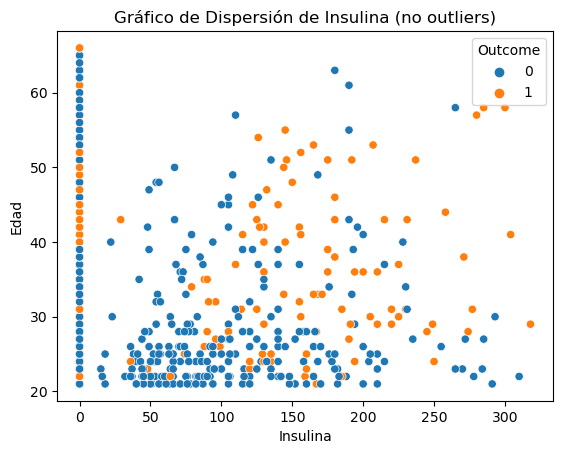

In [106]:
sns.scatterplot(x='Insulin', y='Age', hue='Outcome', data=data_sin_outliers )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Insulina (no outliers)")
plt.xlabel("Insulina")
plt.ylabel("Edad")
plt.show()

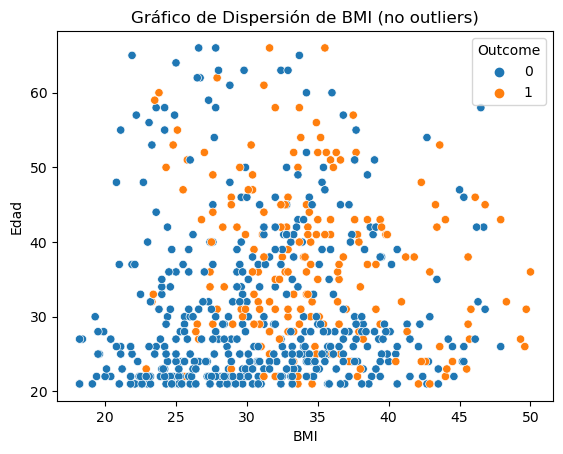

In [107]:
sns.scatterplot(x='BMI', y='Age', hue='Outcome', data=data_sin_outliers)

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de BMI (no outliers)")
plt.xlabel("BMI")
plt.ylabel("Edad")
plt.show()

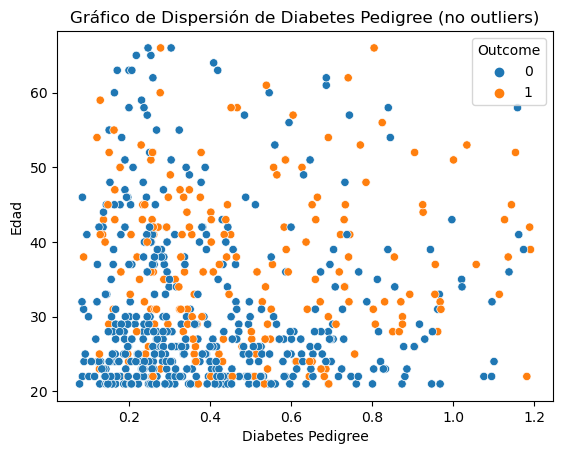

In [108]:
sns.scatterplot(x='DiabetesPedigreeFunction', y='Age', hue='Outcome', data=data_sin_outliers, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Diabetes Pedigree (no outliers)")
plt.xlabel("Diabetes Pedigree")
plt.ylabel("Edad")
plt.show()

### Actualizacion de datos en 0 y normalización

In [109]:
'''
Media de los datos sin outliers
Pregnancies	Glucose	    BloodPressure	SkinThickness	Insulin	    BMI	        DiabetesPedigreeFunction	Age
3.804382	119.112676	72.120501	    20.563380	    65.931142	32.00579	0.429177	                32.715180
'''
data_sin_ceros = data_sin_outliers.copy()
data_sin_ceros.loc[data_sin_ceros['Pregnancies'] == 0, 'Pregnancies'] = 4 #Numeros enteros en el data set se rendondea 3.804382 a 4
data_sin_ceros.loc[data_sin_ceros['Glucose'] == 0, 'Glucose'] = 120 #Numeros enteros en el data set se rendondea  119.112676 a 120
data_sin_ceros.loc[data_sin_ceros['BloodPressure'] == 0, 'BloodPressure'] = 72 #Numeros enteros en el data set se rendondea 72.120501 a 72
data_sin_ceros.loc[data_sin_ceros['SkinThickness'] == 0, 'SkinThickness'] = 21 #Numeros enteros en el data set se rendondea 20.563380 a 21
data_sin_ceros.loc[data_sin_ceros['Insulin'] == 0, 'Insulin'] = 66 #Numeros enteros en el data set se rendondea 65.931142 a 80
data_sin_ceros.loc[data_sin_ceros['BMI'] == 0, 'BMI'] = 32.0 #Numeros enteros en el data set se rendondea 32.00579 a 32.0
data_sin_ceros.loc[data_sin_ceros['DiabetesPedigreeFunction'] == 0, 'DiabetesPedigreeFunction'] = 0.429 #Numeros enteros en el data set se rendondea 0.429177 a 0.429
print("Data sin ceros")
display(data_sin_ceros.head())

'''
Normalizacion de los datos
Minimos
Pregnancies	Glucose	    BloodPressure	SkinThickness	Insulin	    BMI	        DiabetesPedigreeFunction	Age
0.000000	44.000000	38.000000	    0.000000	    0.000000	18.20000	0.078000	                21.000000

Maximos
Pregnancies	Glucose	    BloodPressure	SkinThickness	Insulin	    BMI	        DiabetesPedigreeFunction	Age
13.000000	198.000000	106.000000	    60.000000	    318.000000	50.00000	1.191000	                66.000000	
'''
data_normalizada = data_sin_ceros.copy()
data_normalizada['Pregnancies'] = (data_normalizada['Pregnancies'] - data_normalizada['Pregnancies'].min()) / (data_normalizada['Pregnancies'].max() - data_normalizada['Pregnancies'].min())
data_normalizada['Glucose'] = (data_normalizada['Glucose'] - data_normalizada['Glucose'].min()) / (data_normalizada['Glucose'].max() - data_normalizada['Glucose'].min())
data_normalizada['BloodPressure'] = (data_normalizada['BloodPressure'] - data_normalizada['BloodPressure'].min()) / (data_normalizada['BloodPressure'].max() - data_normalizada['BloodPressure'].min())
data_normalizada['SkinThickness'] = (data_normalizada['SkinThickness'] - data_normalizada['SkinThickness'].min()) / (data_normalizada['SkinThickness'].max() - data_normalizada['SkinThickness'].min())
data_normalizada['Insulin'] = (data_normalizada['Insulin'] - data_normalizada['Insulin'].min()) / (data_normalizada['Insulin'].max() - data_normalizada['Insulin'].min())
data_normalizada['BMI'] = (data_normalizada['BMI'] - data_normalizada['BMI'].min()) / (data_normalizada['BMI'].max() - data_normalizada['BMI'].min())
data_normalizada['DiabetesPedigreeFunction'] = (data_normalizada['DiabetesPedigreeFunction'] - data_normalizada['DiabetesPedigreeFunction'].min()) / (data_normalizada['DiabetesPedigreeFunction'].max() - data_normalizada['DiabetesPedigreeFunction'].min())
data_normalizada['Age'] = (data_normalizada['Age'] - data_normalizada['Age'].min()) / (data_normalizada['Age'].max() - data_normalizada['Age'].min())
print("Data normalizada")
display(data_normalizada.head())


Data sin ceros


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,66,33.6,0.627,50,1
1,1,85,66,29,66,26.6,0.351,31,0
2,8,183,64,21,66,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,21,66,25.6,0.201,30,0


Data normalizada


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.416667,0.675325,0.500000,0.528302,0.168317,0.484277,0.493261,0.644444,1
1,0.000000,0.266234,0.411765,0.415094,0.168317,0.264151,0.245283,0.222222,0
2,0.583333,0.902597,0.382353,0.264151,0.168317,0.160377,0.533693,0.244444,1
3,0.000000,0.292208,0.411765,0.301887,0.260726,0.311321,0.079964,0.000000,0
5,0.333333,0.467532,0.529412,0.264151,0.168317,0.232704,0.110512,0.200000,0


### División del dataset

In [110]:
# Antes de dividir los datos, barajamos el dataset de forma aleatoria para mayor diversidad de datos
dataset_shuffled = shuffle(data_sin_outliers, random_state=20)  # random_state para reproducibilidad
dataset_shuf_sin_ceros = shuffle(data_sin_ceros, random_state=20)  # random_state para reproducibilidad
dataset_shuf_normalizada = shuffle(data_normalizada, random_state=20)  # random_state para reproducibilidad
# random_state = 50 malos resultados en el modelo || random_state = 20 buenos resultados en el modelo

# Dividir los datos en conjunto de entrenamiento y prueba
p_train = 0.8  # Porcentaje de training set
train_index = int(len(dataset_shuffled) * p_train)

dataFrameTraining = dataset_shuffled[:train_index]
dataFrameTraining_sin_ceros = dataset_shuf_sin_ceros[:train_index]
dataFrameTraining_normalizada = dataset_shuf_normalizada[:train_index]

dataFrameTesting = dataset_shuffled[train_index:]
dataFrameTesting_sin_ceros = dataset_shuf_sin_ceros[train_index:]
dataFrameTesting_normalizada = dataset_shuf_normalizada[train_index:]

print("Ejemplos usados para entrenar: ", len(dataFrameTraining))
print("Ejemplos usados para test: ", len(dataFrameTesting))

Ejemplos usados para entrenar:  511
Ejemplos usados para test:  128


### Funcion para dividir los datos en x_train, y_train, x_test, y_test

In [111]:
def xyDivide(dataFrameTraining, dataFrameTesting):
    x_train = dataFrameTraining[[
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'
    ]].values

    y_train = dataFrameTraining['Outcome']

    x_test = dataFrameTesting[[
        'Pregnancies',
        'Glucose',
        'BloodPressure',
        'SkinThickness',
        'Insulin',
        'BMI',
        'DiabetesPedigreeFunction',
        'Age'
    ]].values

    y_test = dataFrameTesting['Outcome']
    return x_train, y_train, x_test, y_test

### Funciones para graficar las métricas

In [112]:
def printAccGraph(lst):
    acc = []
    for i in range(0, len(lst)):
        acc.append(lst[i]['acc'])
    plt.plot(acc)
    plt.title('Accuracy')
    plt.xlabel('Iteraciones')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

def printPrecGraph(lst):
    prec = []
    for i in range(0, len(lst)):
        prec.append(lst[i]['prec'])
    plt.plot(prec)
    plt.title('Precision')
    plt.xlabel('Iteraciones')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.show()

def printRecGraph(lst):
    rec = []
    for i in range(0, len(lst)):
        rec.append(lst[i]['rec'])
    plt.plot(rec)
    plt.title('Recall')
    plt.xlabel('Iteraciones')
    plt.ylabel('Recall')
    plt.grid(True)
    plt.show()

def printF1Graph(lst):
    f1 = []
    for i in range(0, len(lst)):
        f1.append(lst[i]['f1'])
    plt.plot(f1)
    plt.title('F1')
    plt.xlabel('Iteraciones')
    plt.ylabel('F1')
    plt.grid(True)
    plt.show()

def printAucGraph(lst):
    auc = []
    for i in range(0, len(lst)):
        auc.append(lst[i]['auc'])
    plt.plot(auc)
    plt.title('AUC')
    plt.xlabel('Iteraciones')
    plt.ylabel('AUC')
    plt.grid(True)
    plt.show()

## KNN y metricas del KNN

### KNN con data set sin outliers

Max AUC
k = 53 || AUC = 0.7647757647757648 || Precision = 0.9523809523809523 || Recall = 0.5405405405405406 || F1 = 0.6896551724137931 || Accuracy = 0.859375
Max Percision
k = 66 || AUC = 0.7027027027027027 || Precision = 1.0 || Recall = 0.40540540540540543 || F1 = 0.5769230769230769 || Accuracy = 0.828125
Max Recall
k = 3 || AUC = 0.7393822393822393 || Precision = 0.6388888888888888 || Recall = 0.6216216216216216 || F1 = 0.6301369863013699 || Accuracy = 0.7890625
Max F1
k = 53 || AUC = 0.7647757647757648 || Precision = 0.9523809523809523 || Recall = 0.5405405405405406 || F1 = 0.6896551724137931 || Accuracy = 0.859375
Max Accuracy
k = 53 || AUC = 0.7647757647757648 || Precision = 0.9523809523809523 || Recall = 0.5405405405405406 || F1 = 0.6896551724137931 || Accuracy = 0.859375


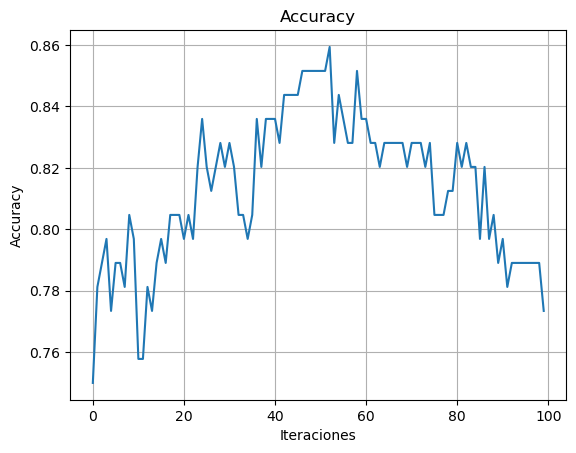

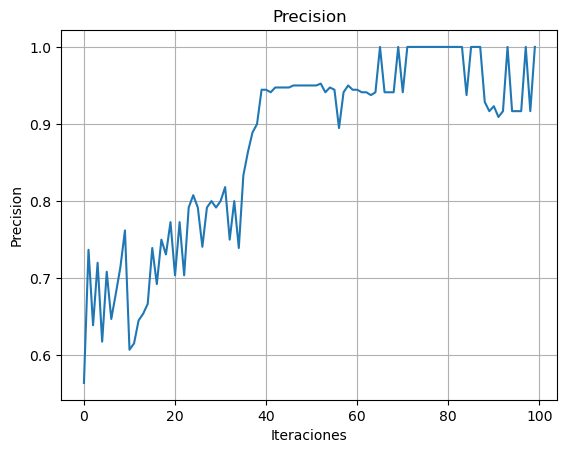

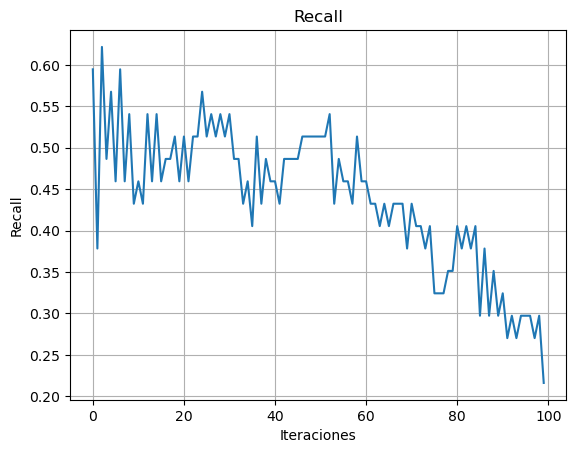

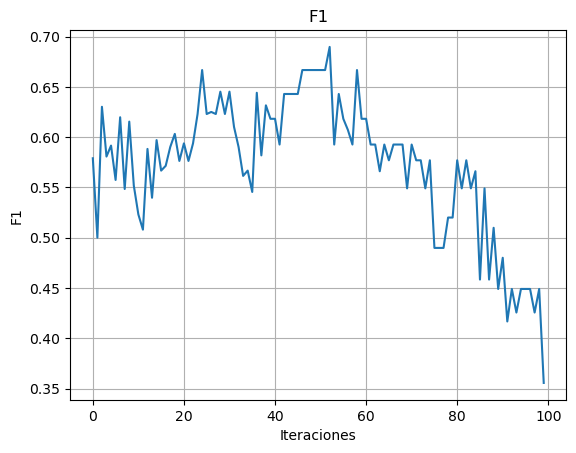

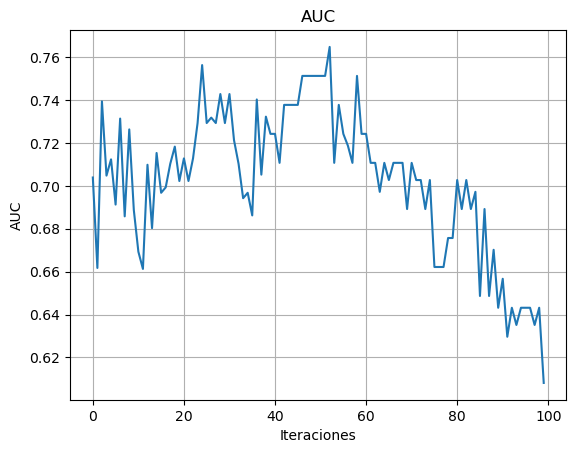

'plt.plot(roc[0], roc[1], label=f"K = {i}")\nplt.xlabel("False Positive Rate")\nplt.ylabel("True Positive Rate")\nplt.title("ROC Curve")\nplt.grid(True)\nplt.legend()\nplt.show()'

In [113]:
x_train, y_train, x_test, y_test = xyDivide(dataFrameTraining, dataFrameTesting)
lst = []

for i in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lst.append({"k": i, "acc": acc, "prec": prec, "rec": rec, "f1": f1, "auc": auc, "roc": roc})


maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"k = {maxAuc['k']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Percision")
print(f"k = {maxPrec['k']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"k = {maxRec['k']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"k = {maxF1['k']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"k = {maxAcc['k']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)


'''plt.plot(roc[0], roc[1], label=f"K = {i}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid(True)
plt.legend()
plt.show()'''

### KNN data set sin ceros

Max AUC
k = 45 || AUC = 0.7808137808137809 || Precision = 0.88 || Recall = 0.5945945945945946 || F1 = 0.7096774193548386 || Accuracy = 0.859375
Max Percision
k = 68 || AUC = 0.7107217107217108 || Precision = 0.9411764705882353 || Recall = 0.43243243243243246 || F1 = 0.5925925925925927 || Accuracy = 0.828125
Max Recall
k = 3 || AUC = 0.7368577368577369 || Precision = 0.6666666666666666 || Recall = 0.5945945945945946 || F1 = 0.6285714285714286 || Accuracy = 0.796875
Max F1
k = 45 || AUC = 0.7808137808137809 || Precision = 0.88 || Recall = 0.5945945945945946 || F1 = 0.7096774193548386 || Accuracy = 0.859375
Max Accuracy
k = 45 || AUC = 0.7808137808137809 || Precision = 0.88 || Recall = 0.5945945945945946 || F1 = 0.7096774193548386 || Accuracy = 0.859375


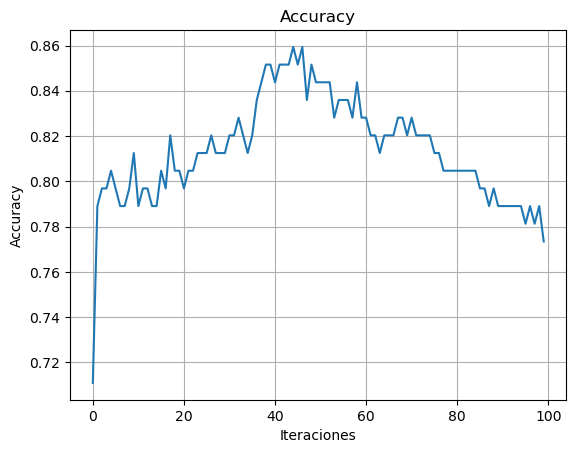

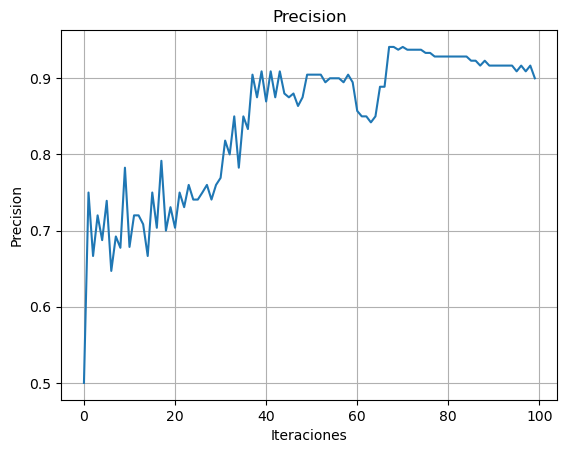

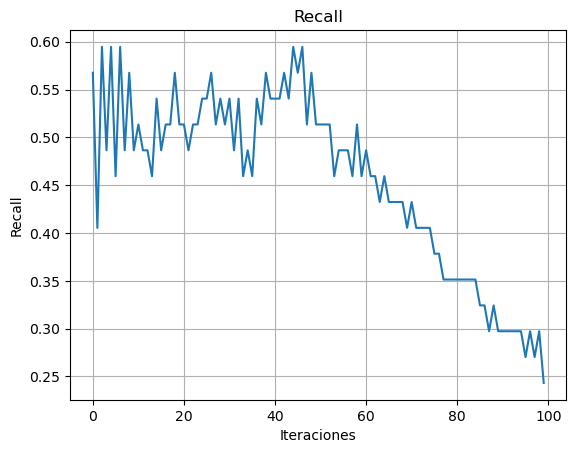

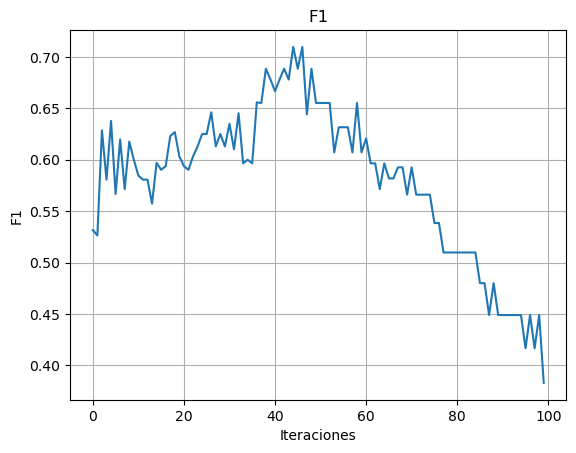

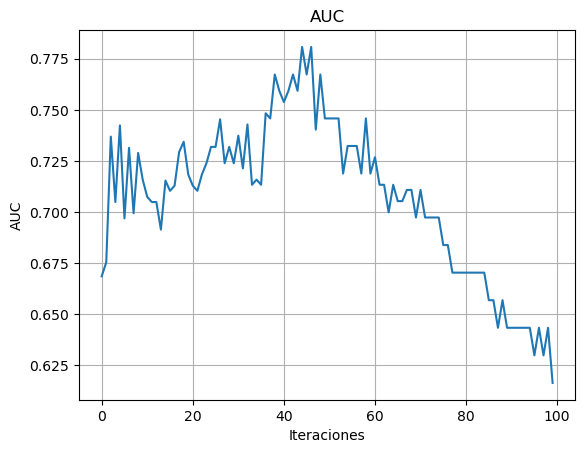

'plt.plot(roc[0], roc[1], label=f"K = {i}")\nplt.xlabel("False Positive Rate")\nplt.ylabel("True Positive Rate")\nplt.title("ROC Curve")\nplt.grid(True)\nplt.legend()\nplt.show()'

In [114]:
x_train, y_train, x_test, y_test = xyDivide(dataFrameTraining_sin_ceros, dataFrameTesting_sin_ceros)
lst = []

for i in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lst.append({"k": i, "acc": acc, "prec": prec, "rec": rec, "f1": f1, "auc": auc, "roc": roc})


maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"k = {maxAuc['k']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Percision")
print(f"k = {maxPrec['k']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"k = {maxRec['k']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"k = {maxF1['k']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"k = {maxAcc['k']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)


'''plt.plot(roc[0], roc[1], label=f"K = {i}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid(True)
plt.legend()
plt.show()'''

### KNN data set normalizado

Max AUC
k = 53 || AUC = 0.7647757647757648 || Precision = 0.9523809523809523 || Recall = 0.5405405405405406 || F1 = 0.6896551724137931 || Accuracy = 0.859375
Max Percision
k = 66 || AUC = 0.7027027027027027 || Precision = 1.0 || Recall = 0.40540540540540543 || F1 = 0.5769230769230769 || Accuracy = 0.828125
Max Recall
k = 3 || AUC = 0.7393822393822393 || Precision = 0.6388888888888888 || Recall = 0.6216216216216216 || F1 = 0.6301369863013699 || Accuracy = 0.7890625
Max F1
k = 53 || AUC = 0.7647757647757648 || Precision = 0.9523809523809523 || Recall = 0.5405405405405406 || F1 = 0.6896551724137931 || Accuracy = 0.859375
Max Accuracy
k = 53 || AUC = 0.7647757647757648 || Precision = 0.9523809523809523 || Recall = 0.5405405405405406 || F1 = 0.6896551724137931 || Accuracy = 0.859375


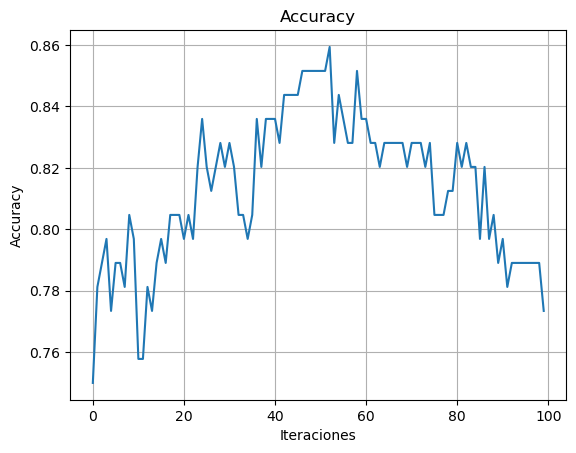

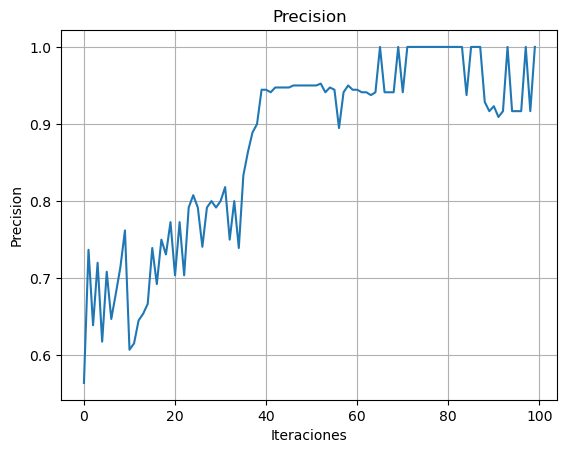

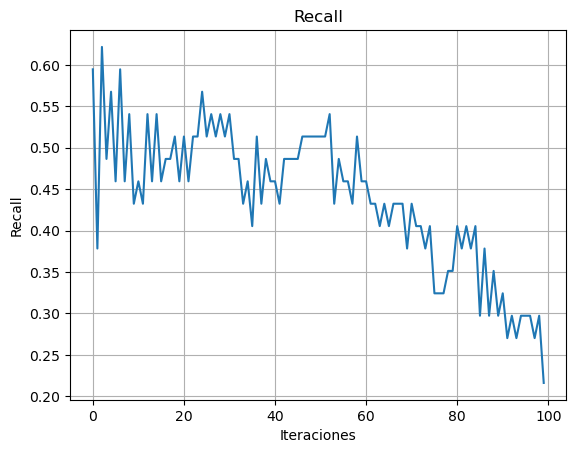

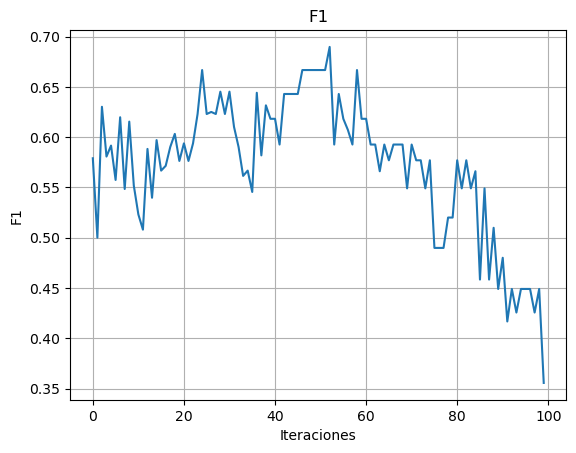

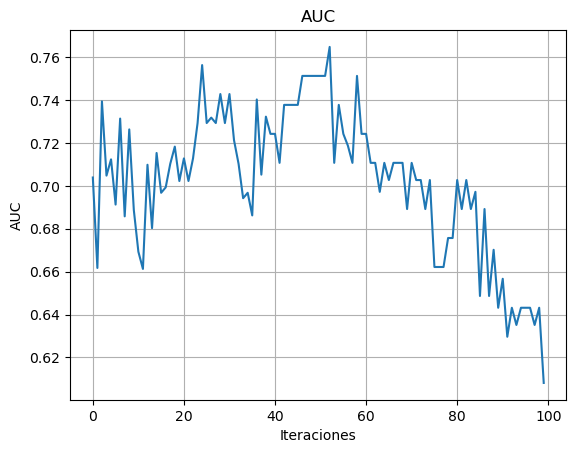

'plt.plot(roc[0], roc[1], label=f"K = {i}")\nplt.xlabel("False Positive Rate")\nplt.ylabel("True Positive Rate")\nplt.title("ROC Curve")\nplt.grid(True)\nplt.legend()\nplt.show()'

In [115]:
x_train, y_train, x_test, y_test = xyDivide(dataFrameTraining, dataFrameTesting)
lst = []

for i in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lst.append({"k": i, "acc": acc, "prec": prec, "rec": rec, "f1": f1, "auc": auc, "roc": roc})


maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"k = {maxAuc['k']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Percision")
print(f"k = {maxPrec['k']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"k = {maxRec['k']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"k = {maxF1['k']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"k = {maxAcc['k']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)


'''plt.plot(roc[0], roc[1], label=f"K = {i}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid(True)
plt.legend()
plt.show()'''

## Redes neuronales

In [119]:
inicio = 1
fin = 300

x_train, y_train, x_test, y_test = xyDivide(dataFrameTraining_normalizada, dataFrameTesting_normalizada)

# Imprimir números de 25 en 25 dentro del rango especificado
for i in range(inicio, fin + 1, 25):

    model = MLPClassifier(
        hidden_layer_sizes=(i,),    # Three hidden layers with 50 units each
        activation='relu',               # Activation function (ReLU)
        solver='lbfgs',                   # Optimizer algorithm
        max_iter=5000,                    # Maximum number of iterations
        random_state=123                  # Random seed for reproducibility
    )

    # Train the model
    model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(x_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print('Neuronas: ' + str(i) + ', Redes: 1')
    print(f'Accuracy: {accuracy:.2f}')

    # Generate classification report
    print(classification_report(y_test, y_pred, zero_division=1))

Neuronas: 1, Redes: 1
Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        91
           1       0.65      0.59      0.62        37

    accuracy                           0.79       128
   macro avg       0.74      0.73      0.74       128
weighted avg       0.78      0.79      0.79       128

Neuronas: 26, Redes: 1
Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        91
           1       0.60      0.57      0.58        37

    accuracy                           0.77       128
   macro avg       0.71      0.71      0.71       128
weighted avg       0.76      0.77      0.76       128

Neuronas: 51, Redes: 1
Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        91
           1       0.49      0.51      0.50        37

    accuracy                           0.70       128
   macro avg   

In [ ]:
inicio = 1
fin = 300

# Imprimir números de 25 en 25 dentro del rango especificado
for i in range(inicio, fin + 1, 25):

    model = MLPClassifier(
        hidden_layer_sizes=(i,i,),    # Three hidden layers with 50 units each
        activation='relu',               # Activation function (ReLU)
        solver='lbfgs',                   # Optimizer algorithm
        max_iter=5000,                    # Maximum number of iterations
        random_state=123                  # Random seed for reproducibility
    )

    # Train the model
    model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(x_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print('Neuronas: ' + str(i) + ', Redes: 2')
    print(f'Accuracy: {accuracy:.2f}')

    # Generate classification report
    print(classification_report(y_test, y_pred, zero_division=1))

In [ ]:
inicio = 1
fin = 300

# Imprimir números de 25 en 25 dentro del rango especificado
for i in range(inicio, fin + 1, 25):

    model = MLPClassifier(
        hidden_layer_sizes=(i,i,i,),    # Three hidden layers with 50 units each
        activation='relu',               # Activation function (ReLU)
        solver='lbfgs',                   # Optimizer algorithm
        max_iter=5000,                    # Maximum number of iterations
        random_state=123                  # Random seed for reproducibility
    )

    # Train the model
    model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(x_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print('Neuronas: ' + str(i) + ', Redes: 3')
    print(f'Accuracy: {accuracy:.2f}')

    # Generate classification report
    print(classification_report(y_test, y_pred, zero_division=1))

In [ ]:
inicio = 1
fin = 300

# Imprimir números de 25 en 25 dentro del rango especificado
for i in range(inicio, fin + 1, 25):

    model = MLPClassifier(
        hidden_layer_sizes=(i,i,i,i,),    # Three hidden layers with 50 units each
        activation='relu',               # Activation function (ReLU)
        solver='lbfgs',                   # Optimizer algorithm
        max_iter=5000,                    # Maximum number of iterations
        random_state=123                  # Random seed for reproducibility
    )

    # Train the model
    model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(x_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
     print('Neuronas: ' + str(i) + ', Redes: 4')
    print(f'Accuracy: {accuracy:.2f}')

    # Generate classification report
    print(classification_report(y_test, y_pred, zero_division=1))

In [ ]:
inicio = 1
fin = 300

# Imprimir números de 25 en 25 dentro del rango especificado
for i in range(inicio, fin + 1, 25):

    model = MLPClassifier(
        hidden_layer_sizes=(i,i,i,i,i,),    # Three hidden layers with 50 units each
        activation='relu',               # Activation function (ReLU)
        solver='lbfgs',                   # Optimizer algorithm
        max_iter=5000,                    # Maximum number of iterations
        random_state=123                  # Random seed for reproducibility
    )

    # Train the model
    model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(x_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print('Neuronas: ' + str(i) + ', Redes: 5')
    print(f'Accuracy: {accuracy:.2f}')

    # Generate classification report
    print(classification_report(y_test, y_pred, zero_division=1))

# Carga del dataset "The Spotify Hit Predictor Dataset (1960-2019)" específico del 2010 al 2019

In [ ]:
data = pd.read_csv('dataset-of-10s.csv')
print("data head")
display(data.head())
print("data info")
display(data.describe())